# Sensitivity analysis with DVARS
## --Data-driven Variogram Analysis of Response Surfaces--

This notebook uses the Monaco package to do a sensitivy analysis of the input data on the output data. No need to do any simulation. The package typically utilizes a Monte Carlo simulation approach, but we can circumvent this by simply giving our own input and output variables with their values.

I've made a small template we can use.

In [1]:
# Import the Monaco package to run our sensitivity analysis
import monaco as mc


C:\Users\mvandenberg7\AppData\Roaming\Python\Python311\site-packages\monaco\dvars_sensitivity.py:19: UserWarning: Consider installing numba for better performance
  warn("Consider installing numba for better performance", UserWarning)


In [2]:
# The preprocessing function should only take in an Case object, and extract the
# values from inside it in order to build the inputs for the run function.
def template_preprocess(case):

    variables = {
        'In1' : case.invals['Var1'].val,
        'In2' : case.invals['Var2'].val,
        'In3' : case.invals['Var3'].val,
        'In4' : case.invals['Var4'].val,
        'In5' : case.invals['Var5'].val,
        'In6' : case.invals['Var6'].val,
        'In7' : case.invals['Var7'].val,
        'In8' : case.invals['Var8'].val,
        'In9' : case.invals['Var9'].val,
        'In10' : case.invals['Var10'].val,
        'In11' : case.invals['Var11'].val,
        'In12' : case.invals['Var12'].val,
        'In13' : case.invals['Var13'].val,
        'In14' : case.invals['Var14'].val,
        'In15' : case.invals['Var15'].val,
        'In16' : case.invals['Var16'].val,
        'In17' : case.invals['Var17'].val,
        'In18' : case.invals['Var18'].val,
        'In19' : case.invals['Var19'].val,
        'In20' : case.invals['Var20'].val,
        'In21' : case.invals['Var21'].val,
        'In22' : case.invals['Var22'].val,
        'In23' : case.invals['Var23'].val,
        'In24' : case.invals['Var24'].val
    }
    
    return variables

In [3]:
# The run function input arguments need to match up with the outputs in the unpacked
# tuple from your preprocessing function
def template_run(variables):
    
    # We do nothing with the input so we just return the variables
    
    return variables

In [4]:
# For your postprocessing function, the first argument must be the case, and
# all input arguments after case need to match up with the outputs in the unpacked
# tuple from your run function.
def template_postprocess(case, variables):
    
    # Don't actually have any output so simply add OutVals only
    
    case.addOutVal(name='Out1', val=case.outvals['Out1'].val)
    case.addOutVal(name='Out2', val=case.outvals['Out2'].val)
    case.addOutVal(name='Out3', val=case.outvals['Out3'].val)

In [5]:
# These get packaged in the following format for Sim to consume:
fcns = {'preprocess' : template_preprocess,
        'run'        : template_run,
        'postprocess': template_postprocess}

In [6]:
ndraws = 128
# We first initialize the sim with a name of our choosing
sim = mc.Sim(name='DVARS', ndraws=ndraws, fcns=fcns,
             firstcaseismedian=False,
             singlethreaded=True,
             savecasedata=False, savesimdata=False,
             verbose=True, debug=False)

In [7]:
sim.importInVars(r"C:\Users\mvandenberg7\surfdrive\PhD\ice_classic\sandbox\DVARS\test_invars.csv")

Importing InVals from file...
Generating cases... Done
InVals loaded from 'test_invars.csv' and converted to variables


In [8]:
sim.importOutVars(r"C:\Users\mvandenberg7\surfdrive\PhD\ice_classic\sandbox\DVARS\test_outvars.csv")

Importing OutVals from file...
OutVals loaded from 'test_outvars.csv' and converted to variables


In [9]:
# sim.calcSensitivities('Out1', verbose=False)

In [10]:
# fig, ax = mc.plot_sensitivities(sim.outvars['Out1'])

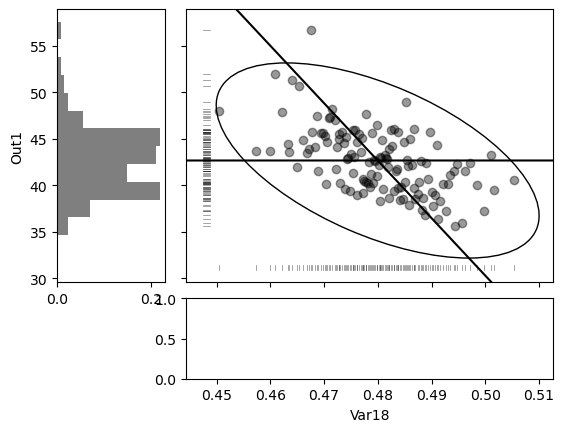

In [15]:
plot_invar = sim.invars['Var18']
plot_outvar = sim.outvars['Out1']
fig, axs = mc.multi_plot([plot_invar, plot_outvar], rug_plot=True, cov_plot=True)

In [12]:
sim.cases

[Case(ncase=0,
   invals={} 
   outvals={'Out1': OutVal('Out1', ncase=0, val=37.22638013746332 (37.22638013746332)), 'Out2': OutVal('Out2', ncase=0, val=138.1154333834013 (138.1154333834013)), 'Out3': OutVal('Out3', ncase=0, val=4.519322225401908 (4.519322225401908))}),
 Case(ncase=1,
   invals={} 
   outvals={'Out1': OutVal('Out1', ncase=1, val=45.33638626393634 (45.33638626393634)), 'Out2': OutVal('Out2', ncase=1, val=189.3232490880176 (189.3232490880176)), 'Out3': OutVal('Out3', ncase=1, val=4.628575654570431 (4.628575654570431))}),
 Case(ncase=2,
   invals={} 
   outvals={'Out1': OutVal('Out1', ncase=2, val=48.96544728841605 (48.96544728841605)), 'Out2': OutVal('Out2', ncase=2, val=203.81679938581678 (203.81679938581678)), 'Out3': OutVal('Out3', ncase=2, val=4.608036153564215 (4.608036153564215))}),
 Case(ncase=3,
   invals={} 
   outvals={'Out1': OutVal('Out1', ncase=3, val=39.214909864860516 (39.214909864860516)), 'Out2': OutVal('Out2', ncase=3, val=154.34619496158467 (154.346194

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Var1', ylabel='Probability Density'>)

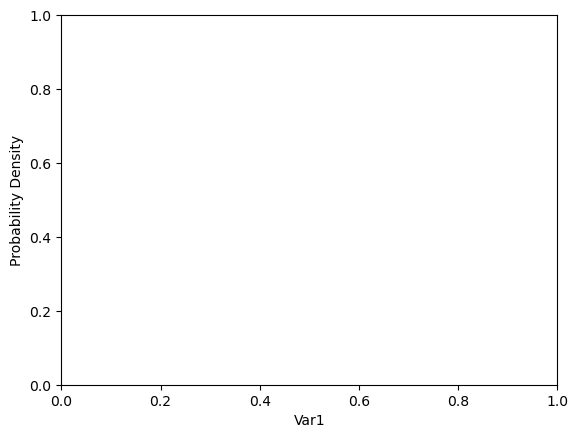

In [13]:
sim.invars['Var1'].plot()